# Time Series Module 3: ARIMA Models and Forecasting

This notebook contains code for AR, MA, ARMA, ARIMA, and SARIMA models using Python's `statsmodels` library.

### Package Installation

Run the cell bello to install the required packages

In [233]:
!pip install statsmodels pandas matplotlib numpy seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Autoregressive (AR)

This section demonstrates how to fit an Autoregressive (AR) model using the `statsmodels` library.

In [234]:
# Import necessary libraries
import numpy as np # kalkulasi matematika
import pandas as pd # handling data (import data, data jadi tabel)

import matplotlib.pyplot as plt # buat grafik
import seaborn as sns # buat grafik

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [235]:
def parser(x):
    return pd.to_datetime(x, format='%Y-%m-%d')

In [236]:
# Read data
raw_df = pd.read_csv('data/ice_cream.csv', parse_dates=['Tanggal'], index_col='Tanggal')

In [254]:
cropped_df = raw_df['2007':'2017']  # Crop data for the years 2007-2017

<Axes: xlabel='Tanggal'>

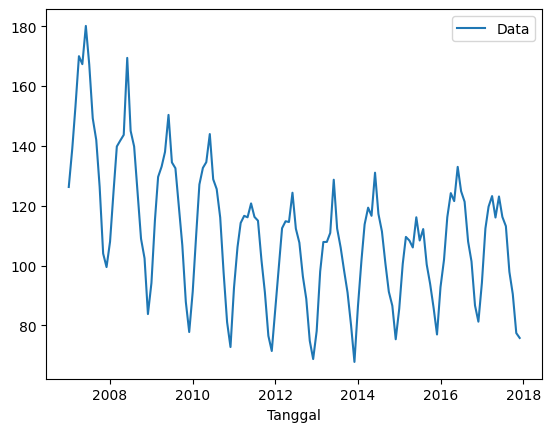

In [255]:
# Graph the data with trend line
sns.lineplot(cropped_df)

In [258]:
cropped_df_difference = cropped_df.diff().diff()

<Axes: xlabel='Tanggal'>

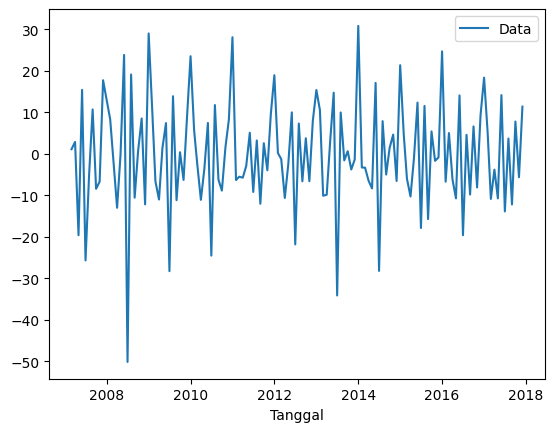

In [259]:
sns.lineplot(cropped_df_difference)

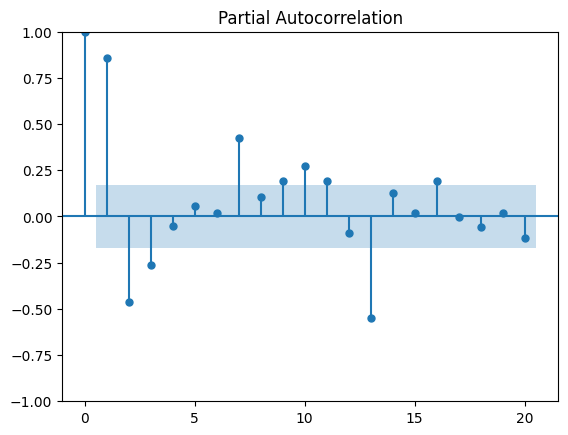

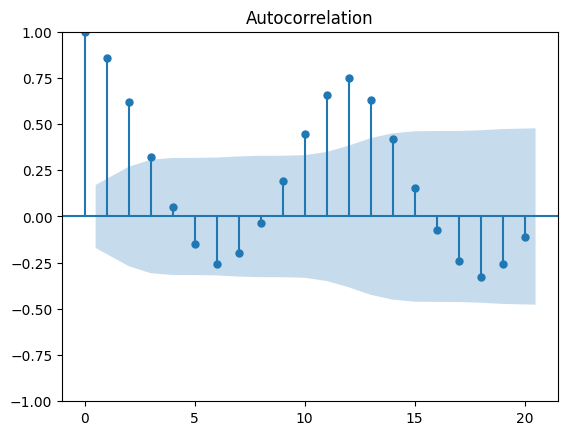

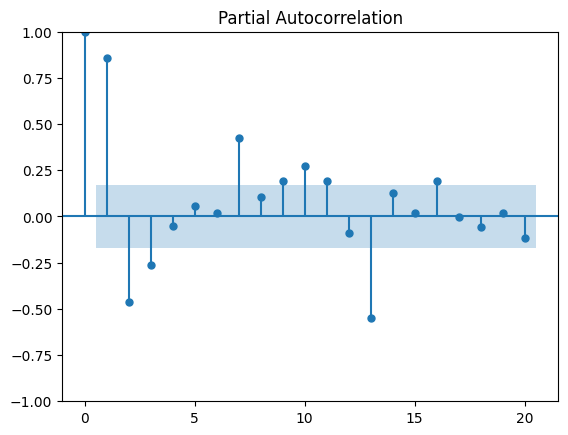

In [260]:
# plot ACF and PACF
plot_acf(cropped_df, lags=20)
plot_pacf(cropped_df, lags=20)

In [ ]:
# ARIMA Model Fitting and Fitted Values Cmparison
arima_model = ARIMA(cropped_df, order=(4, 2, 0)) # ARIMA(p=4, d=1, q=0) for AR(1) model
arima_model_fit = arima_model.fit() # Fit the model

c:\Users\edgra\Amamya\02_University\03_Netlab\time-series-sop\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\edgra\Amamya\02_University\03_Netlab\time-series-sop\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\edgra\Amamya\02_University\03_Netlab\time-series-sop\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [249]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Data   No. Observations:                   72
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -269.230
Date:                  ??, 25 ?? 2025   AIC                            548.459
Time:                        11:01:31   BIC                            559.773
Sample:                    01-01-2007   HQIC                           552.958
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3594      0.131      2.734      0.006       0.102       0.617
ar.L2          0.1760      0.157      1.123      0.261      -0.131       0.483
ar.L3         -0.0710      0.169     -0.420      0.674      -0.402       0.260
ar.L4         -0.2809      0.136     -2.060      0.039      -0.548      -0.014
sigma2       114.0920     21.583      5.286      0.000      71.789     156.395
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.58   Prob(JB):                         0.69
Heteroskedasticity (H):               0.44   Skew:                             0.21
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([13149., 13514., 13879., 14245., 14610., 14975., 15340., 15706.]),
 [Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013')])

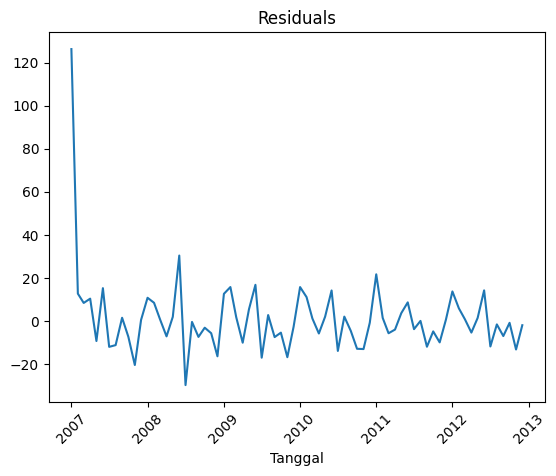

In [250]:
# finding residuals
fitted_values = arima_model_fit.fittedvalues # Get fitted values (in-sample predictions)
df_est = pd.DataFrame({'Original': cropped_df['Data'], 'Fitted': fitted_values}) # Create DataFrame to compare original and fitted values

residuals = df_est['Original'] - df_est['Fitted']
sns.lineplot(residuals)
plt.title('Residuals')
plt.xticks(rotation=45)

(array([15706., 15765., 15826., 15887., 15949., 16010.]),
 [Text(15706.0, 0, '2013-01'),
  Text(15765.0, 0, '2013-03'),
  Text(15826.0, 0, '2013-05'),
  Text(15887.0, 0, '2013-07'),
  Text(15949.0, 0, '2013-09'),
  Text(16010.0, 0, '2013-11')])

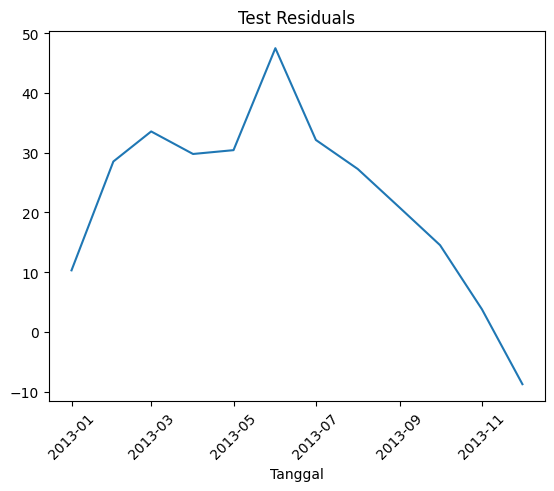

In [251]:
# Predict on test data
test_data = raw_df['2013':'2013']

predictions = arima_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
test_residuals = test_data['Data'] - predictions

sns.lineplot(test_residuals)
plt.title('Test Residuals')
plt.xticks(rotation=45)

<Axes: xlabel='Tanggal', ylabel='Data'>

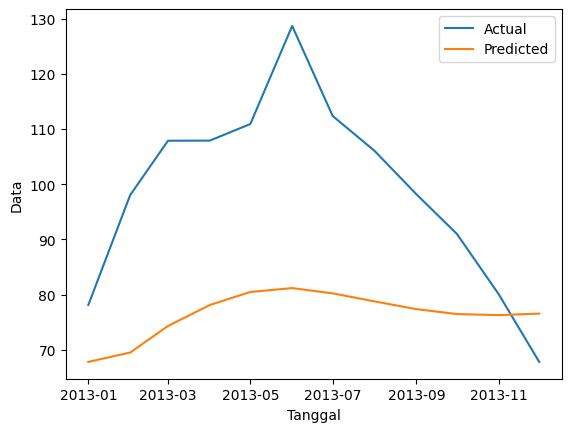

In [252]:
# Prediction vs Actuals
sns.lineplot(test_data['Data'], label='Actual')
sns.lineplot(predictions, label='Predicted')

In [253]:
# Mean Absolute Precent Error
mape = np.mean(np.abs(test_residuals / test_data['Data'])) * 100
print(f'Mean Absolute Percent Error (MAPE): {mape:.2f}%')

# Root Mean Squared Error
rmse = np.sqrt(np.mean(test_residuals**2))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Percent Error (MAPE): 22.88%
Root Mean Squared Error (RMSE): 26.82
